In [1]:
import numpy as np
import matplotlib.pyplot as plt
import wave, sys
import librosa
import librosa.display
import IPython.display as ipd
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import os
import seaborn as sns

In [2]:
# load audio files with librosa
path = r"C:\Users\Venkatesh Yeturi\OneDrive\Desktop\Class pdfs\Biomedical Signal Processing\Assignments\Assignment5\training\speaker01_0_1.wav"

signal, sr = librosa.load(path)
display(ipd.Audio(signal,rate = sr))
# Extracting MFCCs
mfccs = librosa.feature.mfcc(y=signal, n_mfcc=13, sr=sr)
mfccs.mean(axis=1)
print(mfccs.shape) # size 13 is given by us and the number of frames is decided internally by mfcc algorithm

(13, 38)


In [3]:
# Training data - Extracting MFCC      
# we have 300 train samples and so we need to create 
path = r"C:\Users\Venkatesh Yeturi\OneDrive\Desktop\Class pdfs\Biomedical Signal Processing\Assignments\Assignment5\training"
mfccs_train = np.zeros((300,13))

i = 0
for name in sorted(os.listdir(path)):
    if name ==  '.DS_Store':
        continue
    
    else:
        name_path = path+"\\"+str(name)
        signal, sr = librosa.load(name_path) # generally mfcc gives 38 sized vector but we want 13 sized mfcc
        mfccs_train[i] = librosa.feature.mfcc(y=signal, n_mfcc=13, sr=sr).mean(axis=1) # we take only the mean of all the frames 
    i += 1
    

In [15]:
mfccs_train.shape

(300, 13)

In [16]:
#apply kmeans to get the centroids of all the 10 digit classes
kmeans_train = KMeans(n_clusters=10, random_state=0).fit(mfccs_train)

In [6]:
len(kmeans_train.cluster_centers_)

10

In [7]:
kmeans_train.cluster_centers_[0]

array([-3.62511801e+02,  1.10015649e+02, -6.61034193e+00,  2.90173550e+01,
       -1.66852159e+01, -7.35507819e+00, -5.33884011e+00,  3.84795141e+00,
       -9.42897459e+00, -6.04389561e+00, -5.91705080e+00, -1.56326392e+01,
       -2.70001330e-01])

In [8]:
len(kmeans_train.cluster_centers_[0])

13

In [18]:
knn = KNeighborsClassifier(n_neighbors=5)

In [19]:
# Training data Labels
y1 = [0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5,6,6,6,6,6,7,7,7,7,7,8,8,8,8,8,9,9,9,9,9] # of size 50
y_train = np.concatenate((y1,y1,y1,y1,y1,y1),axis=0) # to make the size 300 (50*6=300)

# Testing data Labels
y2 = [0,0,0,1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7,8,8,8,9,9,9] # of size 30
y_test = np.concatenate((y2,y2,y2,y2),axis=0) # TOTAL test size = 30*4 = 120

In [20]:
knn.fit(mfccs_train, y_train)

KNeighborsClassifier()

In [21]:
path = r"C:\Users\Venkatesh Yeturi\OneDrive\Desktop\Class pdfs\Biomedical Signal Processing\Assignments\Assignment5\testing"
print("\nTest Audio File\t\tPredicted Digit\t\tPrediction Result\n")

y_true = []
y_pred = []
i = 0
count_correct=0
for name in os.listdir(path):
    if name ==  '.DS_Store':
        continue
    else:
        filename = r"C:\Users\Venkatesh Yeturi\OneDrive\Desktop\Class pdfs\Biomedical Signal Processing\Assignments\Assignment5\testing\\" + str(name) 
        list_names = filename.split("_");
        true_label = int(str(list_names[len(list_names)-2]))
        y_true.append(true_label)
        
        signal, sr = librosa.load(r"C:\Users\Venkatesh Yeturi\OneDrive\Desktop\Class pdfs\Biomedical Signal Processing\Assignments\Assignment5\testing\\" + str(name))
                                  
        test_mfccs = librosa.feature.mfcc(y=signal, n_mfcc=13, sr=sr).mean(axis=1)
        t = np.transpose(test_mfccs.reshape(-1,1))
        
        pred = knn.predict(t)
        print(f"{name}\t\t{int(pred)}\t\t{int(true_label)}")
        y_pred.append(pred)
        
        if true_label==pred:
            count_correct += 1
            
    i += 1
    


Test Audio File		Predicted Digit		Prediction Result

speaker01_0_10.wav		0		0
speaker01_0_8.wav		0		0
speaker01_0_9.wav		0		0
speaker01_1_10.wav		1		1
speaker01_1_8.wav		1		1
speaker01_1_9.wav		1		1
speaker01_2_10.wav		2		2
speaker01_2_8.wav		2		2
speaker01_2_9.wav		0		2
speaker01_3_10.wav		3		3
speaker01_3_8.wav		3		3
speaker01_3_9.wav		3		3
speaker01_4_10.wav		0		4
speaker01_4_8.wav		4		4
speaker01_4_9.wav		4		4
speaker01_5_10.wav		5		5
speaker01_5_8.wav		5		5
speaker01_5_9.wav		5		5
speaker01_6_10.wav		6		6
speaker01_6_8.wav		6		6
speaker01_6_9.wav		6		6
speaker01_7_10.wav		7		7
speaker01_7_8.wav		7		7
speaker01_7_9.wav		7		7
speaker01_8_10.wav		8		8
speaker01_8_8.wav		8		8
speaker01_8_9.wav		8		8
speaker01_9_10.wav		9		9
speaker01_9_8.wav		9		9
speaker01_9_9.wav		9		9
speaker02_0_10.wav		0		0
speaker02_0_8.wav		7		0
speaker02_0_9.wav		0		0
speaker02_1_10.wav		1		1
speaker02_1_8.wav		1		1
speaker02_1_9.wav		1		1
speaker02_2_10.wav		2		2
speaker02_2_8.wav		2		2
speaker02_2_9.wav		2	

In [22]:
print('total no.of test files : ',i)
print('total no.of correct predictions : ',count_correct)
print('Accuracy : ',round((float(count_correct)/float(i))*100,2))

total no.of test files :  120
total no.of correct predictions :  112
Accuracy :  93.33


<AxesSubplot:>

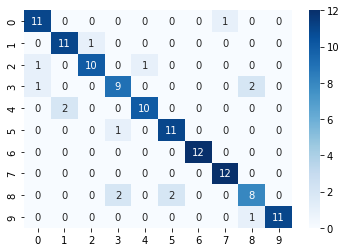

In [14]:
conf_mat = confusion_matrix(y_true,y_pred)
sns.heatmap(conf_mat,annot=True,cmap='Blues')